In [1]:
#Load the data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,average_precision_score
# from imblearn.over_sampling import SMOTE 
%matplotlib inline


data = pd.read_csv("creditcard.csv")

In [2]:
#Exploratory data analysis.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().values.any()

False

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Normal transactions: 284315
Fraud transactions: 492


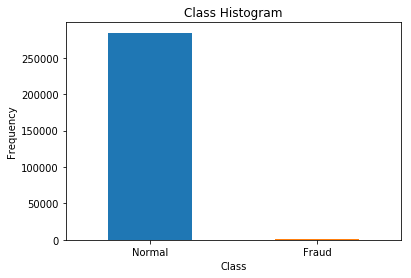

In [6]:
classesNo = pd.value_counts(data['Class'], sort = True)
classesNo.plot(kind = 'bar', rot=0)
plt.title("Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Normal","Fraud"])
print('Normal transactions:', len(data[data.Class==0]))
print('Fraud transactions:', len(data[data.Class==1]))

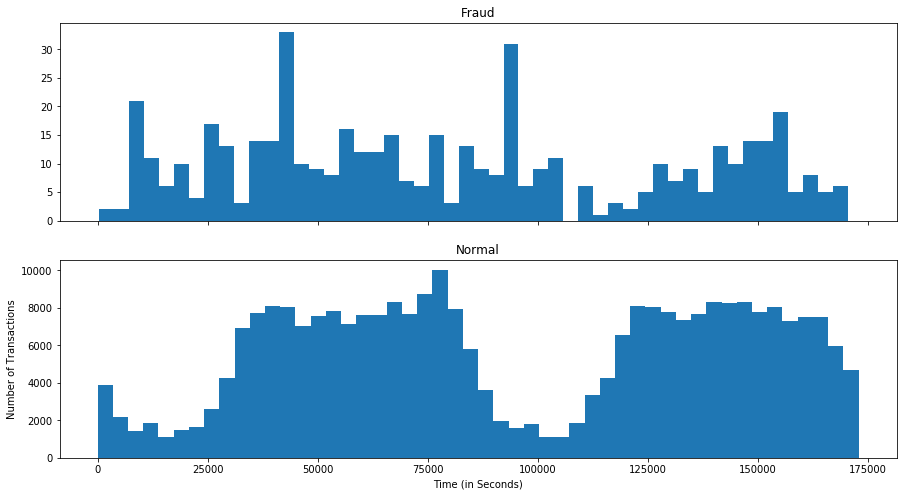

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

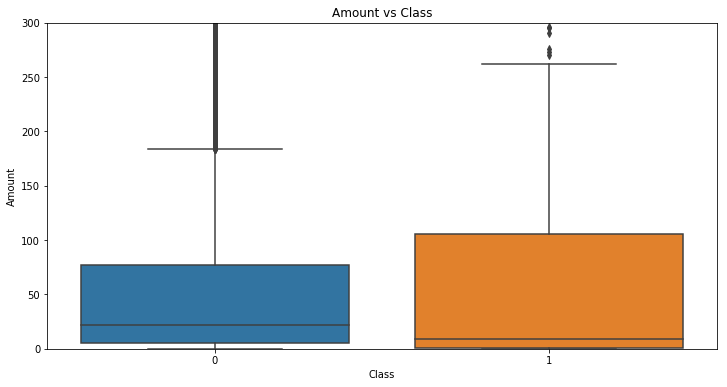

In [8]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = data)
ax.set_ylim([0, 300])
plt.title('Amount vs Class')
plt.show()

In [9]:
#Data preprocessing.
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
#Balance the data.

data = data.sample(frac=1)
n = data[data["Class"] == 0]
print(len(n))
f = data[data["Class"] == 1].sample(n=len(n), replace=True)
print(len(f))

# new_data = n.append(f)

n_data = pd.concat([f, n])

# Shuffle dataframe rows
new_data = n_data.sample(frac=1, random_state=42)

print('New data count:', len(new_data))
print('Normal transactions:', len(new_data[new_data.Class==0]))
print('Fraud transactions:', len(new_data[new_data.Class==1]))
new_data.head(10)

284315
284315
New data count: 568630
Normal transactions: 284315
Fraud transactions: 284315


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157894,2.090536,-0.110536,-3.416026,-0.860336,3.019300,2.750087,0.090636,0.412601,1.335851,-0.338971,...,0.004972,0.254496,-0.004777,0.699739,0.445598,0.220976,-0.096831,-0.089011,-0.273068,0
111464,-0.790119,0.569380,-0.243541,-2.036523,1.948568,3.184279,-0.575459,1.441745,-0.246849,-0.739164,...,-0.175529,-0.809764,0.028065,1.016303,-0.089933,0.674511,0.055944,-0.030347,-0.333399,0
6903,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,-7.297803,...,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,-0.349231,1
199253,-0.225461,1.237235,-0.455442,-0.338601,0.235193,-1.305876,0.740377,0.103173,-0.227349,-0.512345,...,0.414888,1.355929,-0.082171,0.093261,-0.758334,-0.221181,0.387065,0.260897,-0.342475,0
140064,-0.332401,0.415924,1.333119,-0.762646,0.082847,0.401678,0.207937,0.029453,0.417958,-0.718905,...,0.034765,0.335779,-0.318416,-0.873382,0.145818,1.216826,-0.131118,-0.014941,-0.251038,0
150662,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,0.910406,1
143227,1.118982,0.018008,1.116377,0.687606,-0.786243,-0.361463,-0.375929,0.002722,0.242661,-0.179013,...,0.025785,0.143349,0.114012,0.446129,0.086938,0.254108,0.019322,0.032745,-0.257275,0
76854,0.592021,-1.172548,0.257883,0.178266,-0.979193,-0.289943,0.040906,-0.030118,0.136930,-0.148876,...,0.037554,-0.714077,-0.192710,0.054624,-0.105651,0.756190,-0.131491,0.059580,1.013836,0
42549,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,-11.435624,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,-0.000478,1
66166,-2.238382,-0.241174,0.947720,1.352899,0.725030,-1.533881,0.490615,-0.120736,-0.531925,0.238073,...,-0.004535,0.813121,1.111248,0.751886,0.123130,-0.335645,0.034308,-0.019001,-0.273268,0


In [13]:
# Split the dataset into training and testing sets.
X = data.drop('Class', axis=1)
Y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0, shuffle=True)

# Split the balanced dataset into training and testing sets.
X_Balanced = new_data.drop('Class', axis=1)
Y_Balanced = new_data['Class']
XB_train, XB_test, yB_train, yB_test = train_test_split(X_Balanced,Y_Balanced,test_size = 0.3, random_state = 0, shuffle=True)

In [ ]:
#Building Different Models, to evaluate and select the best one using class weigh=balanced.

#First get each models best parameters.

#Decision Tree.
dt_classifier = DecisionTreeClassifier()  

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2,6,1)),
    "min_samples_leaf": list(range(5,9,1)),
    'class_weight' : ['balanced', None]
    }

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'recall', n_jobs=-1)
dt_classifier_gs.fit(X_train, y_train)
best_parameters = dt_classifier_gs.best_params_
print('Decision tree best parameters are: ', best_parameters)

#logistic Regression.
log_classifier = LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

log_classifier_gs = GridSearchCV(estimator = log_classifier, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
log_classifier_gs.fit(X_train, y_train)

best_parameters = log_classifier_gs.best_params_
print('logistic regression best parameters are: ', best_parameters)

# #Random Forest.
# rf_classifier = RandomForestClassifier()
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': [10, 20],
#     'min_samples_split': [2, 5],
#     'n_estimators': [500, 700],
#     'class_weight' : ['balanced', None]
#     }

# rf_classifier_gs = GridSearchCV(estimator = rf_classifier, param_grid = param_grid , scoring = 'recall', n_jobs=-1)
# rf_classifier_gs.fit(X_train, y_train)
# best_parameters = rf_classifier_gs.best_estimator_
# print('Random Forest best parameters are: ', best_parameters)

Decision tree best parameters are:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [15]:
from sklearn.metrics import classification_report

#desicion tree score.
dt_classifier = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,min_samples_leaf=5)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       1.00      0.94      0.97     85290
          1       0.02      0.90      0.05       153

avg / total       1.00      0.94      0.97     85443



In [16]:
#logistic regression score.
log_classifier = LogisticRegression(C= 0.1,class_weight= 'balanced', penalty= 'l1')
log_classifier.fit(X_train, y_train)
y_pred = log_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85290
          1       0.07      0.90      0.12       153

avg / total       1.00      0.98      0.99     85443



In [ ]:
#Building Different Models, to evaluate and select the best one after balancing the dataset.

#First get each models best parameters.

#Decision Tree.
dt_classifier = DecisionTreeClassifier()  

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2,6,1)),
    "min_samples_leaf": list(range(5,9,1)),
    'class_weight' : ['balanced', None]
    }

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'recall', n_jobs=-1)
dt_classifier_gs.fit(XB_train, yB_train)
best_parameters = dt_classifier_gs.best_params_
print('Decision tree best parameters are: ', best_parameters)

#logistic Regression.
log_classifier = LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

log_classifier_gs = GridSearchCV(estimator = log_classifier, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
log_classifier_gs.fit(XB_train, yB_train)

best_parameters = log_classifier_gs.best_params_
print('logistic regression best parameters are: ', best_parameters)

# #Random Forest.
# rf_classifier = RandomForestClassifier()
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': [10, 20],
#     'min_samples_split': [2, 5],
#     'n_estimators': [500, 700],
#     'class_weight' : ['balanced', None]
#     }

# rf_classifier_gs = GridSearchCV(estimator = rf_classifier, param_grid = param_grid , scoring = 'recall', n_jobs=-1)
# rf_classifier_gs.fit(XB_train, yB_train)
# best_parameters = rf_classifier_gs.best_estimator_
# print('Random Forest best parameters are: ', best_parameters)

In [21]:
#desicion tree score.

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5,min_samples_leaf=6)

dt_classifier.fit(XB_train, yB_train)
yB_pred = dt_classifier.predict(XB_test)
print(classification_report(yB_test, yB_pred))


             precision    recall  f1-score   support

          0       0.92      0.98      0.95     85264
          1       0.97      0.92      0.94     85325

avg / total       0.95      0.95      0.95    170589



In [26]:
#logistic regression score.
log_classifier = LogisticRegression(C=10,  penalty='l2')

log_classifier.fit(XB_train, yB_train)
yB_pred = log_classifier.predict(XB_test)
print(classification_report(yB_test, yB_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95     85264
          1       0.98      0.92      0.95     85325

avg / total       0.95      0.95      0.95    170589



Recall metric in the test dataset:  0.921453266921


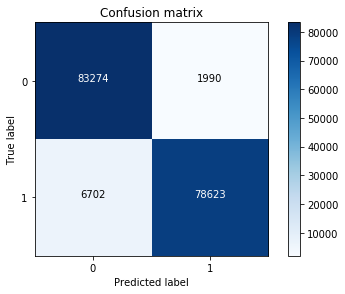

In [32]:
#confusion matrix for balanced data using logistic regression.
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cnf_matrix = confusion_matrix(yB_test, yB_pred)
np.set_printoptions(precision=2)

print("Recall metric in the test dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()